# Project outline

## Introduction

This project will investigate the fossil history of the family Panthera, which includes the big cats (lions, tigers, leopards, jaguars, and few extinct species). The project utilizes data found at paleobiology.org, namely the collections data that contains latitude and longitude coordinates of the fossil as well as the time period to which the fossil belongs and approximations for the fossils age. Mapping the coordinates by either time interval or fossil age will help to visualize the geographic history and distribution of Panthera, showing how and where they have moved throught time. The functions used in this project can be used with any genera. The project will use the UNIX command line to clean up the data. The data will then be run through several python functions to obtain easily graphable data. Finally, the project will use R to visualize the data, providing maps of each time interval that can be added onto the last time interval, with a gradient of colors to represent different time intervals. The project will then run the data through the same python functions in order to obtain the longitudes and latitudes of fossils by the approximate fossil age given in the data. The approximate fossil ages can be used to see more continuous changes in the geography of Panthera through time. 

### References
Fossil data: paleodb.org

Time interval ranges: fossilworks.org

## get_column_names

**file must be a formatted csv file with the head removed and any "\r" characters replaced with newlines**

for this particular file, "panthera_col.csv", I used the following Unix command

tail -n +18 panthera_col.csv > formatted_panthera_col.csv

This function takes in a file and returns the names of all its columns with appropriate indeces

In [84]:
def get_column_names(filename):
    in_file = open(filename) #opens the inputted file
    column_names = {} #create an empty dictionary to populate with the column number as the key and the name of the column as the value
    first_line = in_file.readline() #read in the first line, with only the column names
    column_name_keys = first_line.split('","') #take the column names and split them by '","' to create a list
    num_columns = len(column_name_keys) #get the total number of columns
    for column in range(0, num_columns): #make a for loop that iterates from zero to the num_columns
        column_names[column] = column_name_keys[column]
    in_file.close()
    return column_names

In [85]:
get_column_names("formatted_panthera_col.csv")

{0: '"collection_no',
 1: 'record_type',
 2: 'formation',
 3: 'lng',
 4: 'lat',
 5: 'collection_name',
 6: 'collection_subset',
 7: 'collection_aka',
 8: 'n_occs',
 9: 'early_interval',
 10: 'late_interval',
 11: 'max_ma',
 12: 'min_ma',
 13: 'reference_no"\n'}

## column_extractor

**file must be a formatted csv file with the head removed and any "\r" characters replaced with newlines**

for this particular file, "panthera_col.csv", I used the following Unix command

tail -n +18 panthera_col.csv > formatted_panthera_col.csv


This function will take any two columns and group them together in a dictionary. The keys can be used to identify and match up different values that can be plotted against each other


In [86]:
def column_extractor(file_name, key_column, value_column):
    file_input = open(file_name) #opens the inputted file
    file_input.readline()
    extract_dict = {} #empty dictionary
    for line in file_input:
        y = line.split('","')[key_column] #key column is the y value
        x = line.split('","')[value_column] #value column is the x value
        extract_dict[y] = x #populate dictionary
    file_input.close() 
    return extract_dict

In [87]:
column_extractor("formatted_panthera_col.csv",0, 9)

{'"101897': 'Late Pleistocene',
 '"101899': 'Late Pleistocene',
 '"104033': 'Holocene',
 '"104680': 'Late Pleistocene',
 '"109703': 'Late Pleistocene',
 '"115184': 'Late Pleistocene',
 '"115191': 'Pleistocene',
 '"11803': 'Late Pleistocene',
 '"120834': 'Middle Pleistocene',
 '"13066': 'Pleistocene',
 '"13293': 'Middle Pleistocene',
 '"133644': 'Pleistocene',
 '"13456': 'Late Pleistocene',
 '"136498': 'Late Pleistocene',
 '"13738': 'Holocene',
 '"141367': 'Late Pleistocene',
 '"144976': 'Late Pleistocene',
 '"145508': 'Pleistocene',
 '"147609': 'Pleistocene',
 '"147815': 'Pleistocene',
 '"152009': 'Rancholabrean',
 '"152265': 'Late Miocene',
 '"152266': 'Late Miocene',
 '"152267': 'Late Miocene',
 '"154722': 'Late Pleistocene',
 '"154771': 'Late Pleistocene',
 '"154804': 'Late Pleistocene',
 '"154805': 'Late Pleistocene',
 '"155393': 'Late Pleistocene',
 '"161194': 'Pleistocene',
 '"183123': 'Pleistocene',
 '"183152': 'Early Pleistocene',
 '"20166': 'Irvingtonian',
 '"20283': 'Irvingto

## stratify
**Must supply a dictionary of items "to stratify" and a "dictionary" to stratify over**

**Both dictionaries must have matching keys**

To supply dictionary items to stratify over (species, time interval, etc.) *For this particular example, I have used time interval in which a fossil shows up as the dictionary to stratify over from the file "formatted_panthera_col.csv"*

This function takes two dictionaries with matching keys as arguments. The first one, "to_stratify" provides as its values all the possible items to stratify over. The other dictionary "dictionary"'s values are stratified over the unique list created from to_stratify. The function returns a list of the values from "dictionary" as dictionaries separated by the to_stratify values. The matching keys are used to match up the values from two different dictionaries.


In [88]:
def stratify(to_stratify, dictionary):   
    stratify_list = list(to_stratify.values())
    stratify = [] #empty list to hold unique values of items to stratify over
    list_of_dicts = [] #empty list to hold stratified dictionaries
    #for loop to create unique list of items to stratify over
    for item in stratify_list:
        if item not in stratify:
            stratify.append(item)
    #for loop to create a dictionary per item in stratify
    for item in stratify:
        new_dict = {}
        #iterate through all items to stratify them into different dictionaries
        for key in to_stratify.keys():
            if to_stratify[key] == item:
                new_dict[key] = dictionary[key] #populate new_dict only if correct dictionary
        list_of_dicts.append(new_dict) #add each item that satisfies the category to the new dictionary
    return list_of_dicts

## Make a list with the time intervals in order

In [90]:
stratify_list = column_extractor("formatted_panthera_col.csv",0, 9).values()
intervals = []
for item in stratify_list:
        if item not in intervals:
            intervals.append(item)
print(intervals)
 
#['Middle Pleistocene', 'Early Pleistocene', 'Pleistocene', 'Pliocene', 
# 'Late Pleistocene', 'Ensenadan', 'Irvingtonian', 'Holocene', 
# 'Rancholabrean', 'Late Miocene', 'Piacenzian', 'Gelasian', 
# 'Late Pliocene', 'Zanclean', 'Calabrian', 'Blancan', 
# 'Lujanian', 'Villanyian']



#Take the output and look up the upper and lower boundry of each interval.


#['Middle Pleistocene'=.781 + .126, 'Early Pleistocene' =.781 + 2.588, 'Pleistocene' =2.588 + .012, 
# 'Pliocene'=5.322 + 2.588, 'Late Pleistocene' = .012 +.126, 'Ensenadan'= 1.200+.781, 'Irvingtonian'=1.8 +.3, 
# 'Holocene'=.012 + 0, 'Rancholabrean'= 0.3 +0.012, 'Late Miocene'=11.608+5.332, 'Piacenzian'=3.6+2.588, 
# 'Gelasian'=2.588+1.806, 'Late Pliocene'=3.6.+2.588, 'Zanclean'=5.332+3.6, 'Calabrian'=1.8+.781, 
# 'Blancan'=4.75+1.808, 'Lujanian'=.781+.012, 'Villanyian'=3.2+2.588]

#remove the names of the intervals
upper_and_lower_bounds= [.781 + .126, .781 + 2.588, 2.588 + .012, 
 5.322 + 2.588, .012 +.126, 1.200+.781,.8 +.3, 
 .012 + 0, 0.3 +0.012, .608+5.332, 3.6+2.588, 
 2.588+1.806, 3.6+2.588, 5.332+3.6, 1.8+.781, 
 4.75+1.808, .781+.012, 3.2+2.588]

avg_intervals = [] #empty list to populate with average intervals
for ii in upper_and_lower_bounds:
    avg_intervals.append(ii/2)

    
#now use the indeces of the avg_interval list to get the intervals in the right order

avg={} #empty dictionary to hold the indeces of avg_intervals as keys and the avg_intervals as values
for i in range(0,len(avg_intervals)):
    avg[i] = avg_intervals[i]
interval_order=[] #empty list to hold the correct order of the indeces

#nested for loop to poulate the final list
for i in sorted(avg.values()): #iterates through each value in avg
    for j in avg.keys():
        if avg[j] == i:
            interval_order.append(j)

print(interval_order)

['Middle Pleistocene', 'Early Pleistocene', 'Pleistocene', 'Pliocene', 'Late Pleistocene', 'Ensenadan', 'Irvingtonian', 'Holocene', 'Rancholabrean', 'Late Miocene', 'Piacenzian', 'Gelasian', 'Late Pliocene', 'Zanclean', 'Calabrian', 'Blancan', 'Lujanian', 'Villanyian']
[7, 4, 8, 16, 0, 6, 5, 14, 2, 1, 11, 17, 9, 10, 12, 10, 12, 15, 3, 13]


In [91]:
interval = column_extractor("formatted_panthera_col.csv", 0, 9)
longitude = column_extractor("formatted_panthera_col.csv", 0, 3)
stratify(interval, longitude)

[{'"120834': '113.580559',
  '"13293': '111.566666',
  '"21276': '36.167000',
  '"21277': '36.167000',
  '"21893': '35.000000',
  '"32062': '22.583332',
  '"32082': '22.583332',
  '"34330': '-7.583333',
  '"34925': '-3.518889',
  '"34926': '3.518889',
  '"34927': '-3.518889',
  '"35472': '20.533333',
  '"35476': '20.433332',
  '"36134': '12.300000',
  '"36206': '11.316667',
  '"36214': '14.083333',
  '"40341': '111.699997',
  '"40808': '13.664444',
  '"42866': '-8.874444',
  '"43008': '28.964722',
  '"43016': '14.216667',
  '"43617': '0.150000',
  '"43618': '0.150000',
  '"43649': '11.250000',
  '"43650': '11.250000',
  '"43651': '11.250000',
  '"43653': '11.250000',
  '"43654': '11.250000',
  '"43664': '11.100000',
  '"43699': '13.748611',
  '"43702': '13.729444',
  '"48889': '5.395000',
  '"48908': '5.395000',
  '"48910': '5.395000',
  '"49814': '1.731944',
  '"49816': '1.246667',
  '"50196': '8.266667',
  '"50199': '8.816667',
  '"50249': '10.483333',
  '"50258': '16.934723',
  '"50

## map_plotter
**Must supply two dictionaries with matching keys**

The function takes in two dictionaries with matching keys and plots both dictionaries' values as a scatterplot, and returns it

In [92]:
def map_plotter(x_dict, y_dict):
    lattitude = [] #empty list for lattitudes
    longitude = [] #empty list for longitudes
    
    #extract the values from x_dict into a list so it is plottable
    x_list = list(x_dict.keys()) #make a list of all the keys
    for item in x_list:
        longitude.append(float(x_dict[item])) #make sure value is a float
    
    #do the same for lattitude
    y_list = list(y_dict.keys()) 
    for item in y_list:
        lattitude.append(float(y_dict[item]))
    
    import matplotlib.pyplot as plt
    
    #plot and return
    plt.plot(longitude, lattitude, 'bo')
    return plt.show()

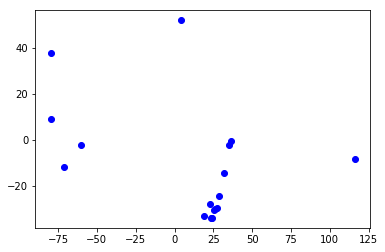

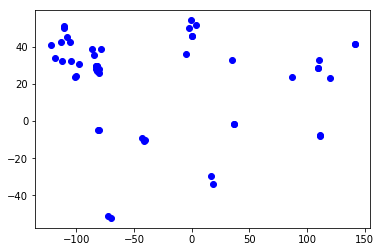

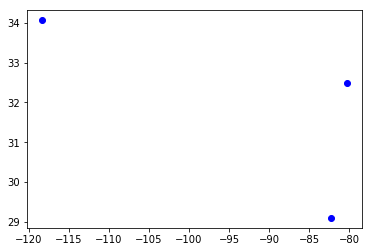

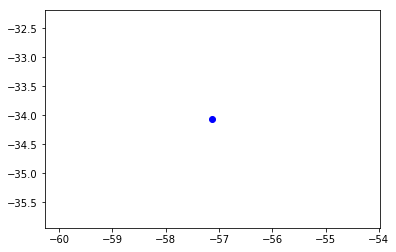

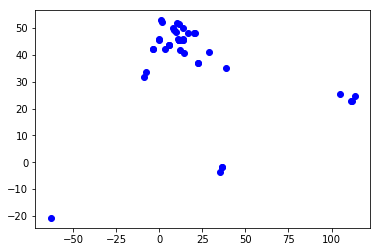

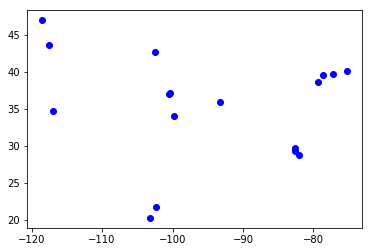

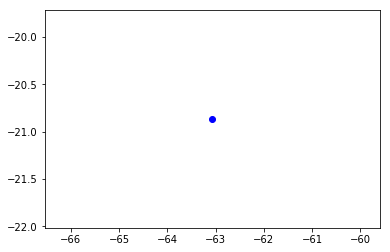

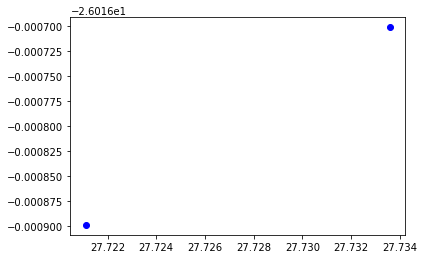

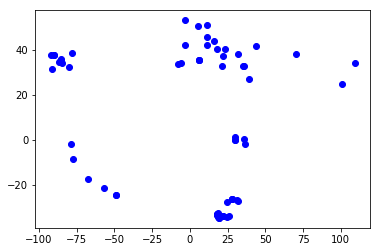

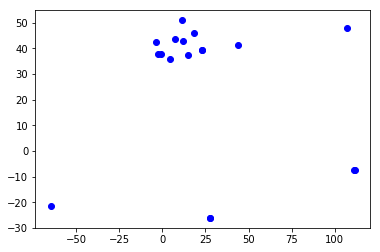

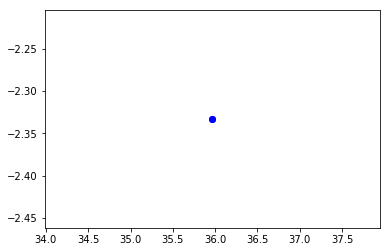

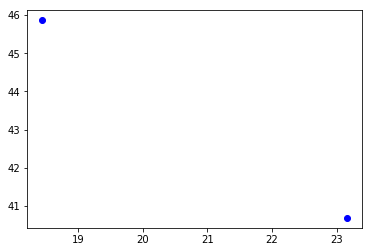

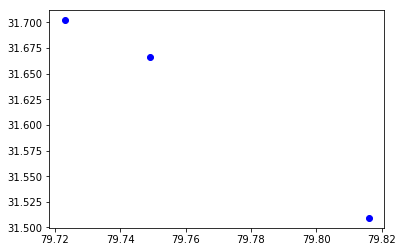

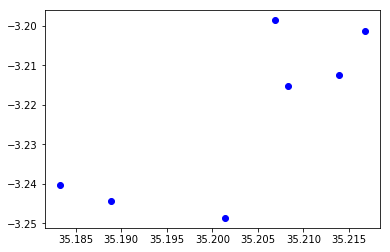

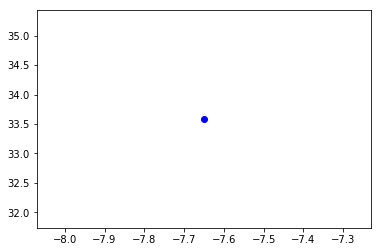

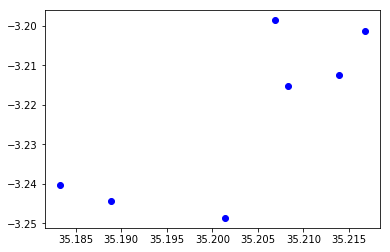

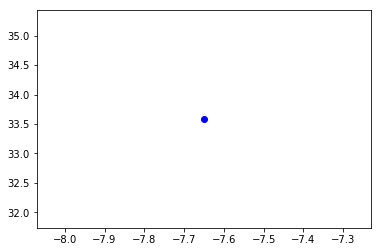

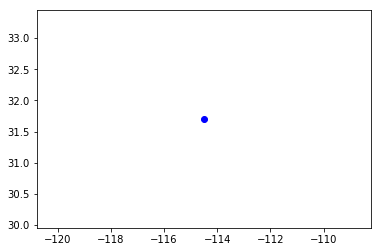

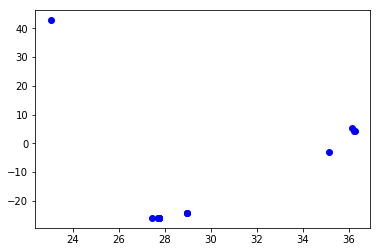

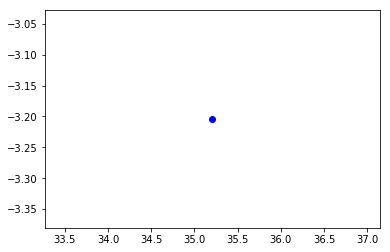

In [93]:
interval = column_extractor("formatted_panthera_col.csv", 0, 9) #extract interval column
longitude = column_extractor("formatted_panthera_col.csv", 0, 3) #extract longitude column
latitude = column_extractor("formatted_panthera_col.csv", 0, 4) #extract latitude column
strat_lng = stratify(interval, longitude) #list of longitude dictionaries
strat_lat = stratify(interval, latitude) #list of latitude dictionaries


#this portion can be better done in r, where each new graph can be added to the last one


#this for loop will go through the intervals in the correct order 
for index in interval_order:    
    x = strat_lng[index]
    y = strat_lat[index]
    map_plotter(x, y)

## Graphing by fossil age

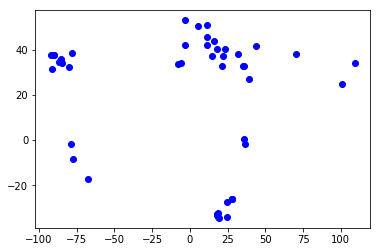

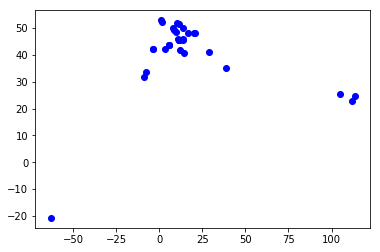

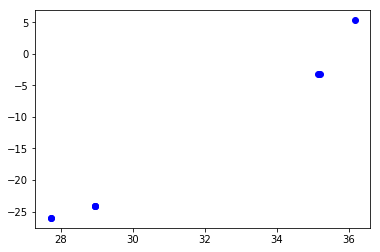

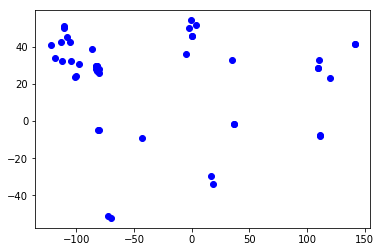

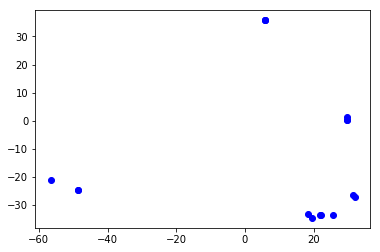

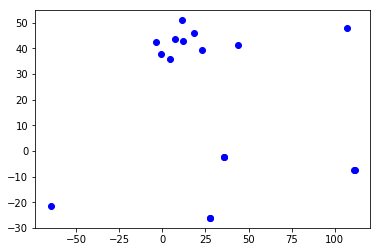

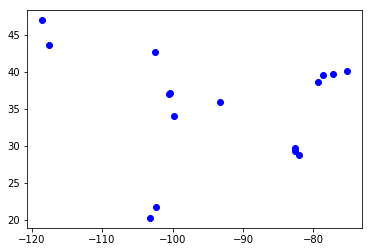

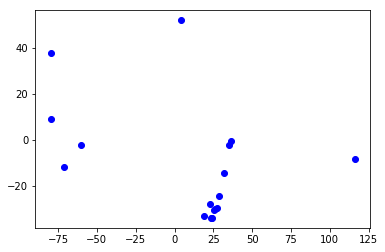

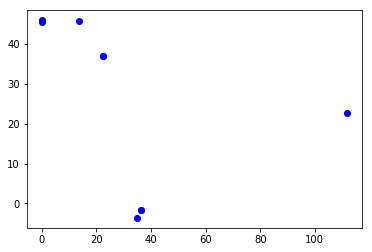

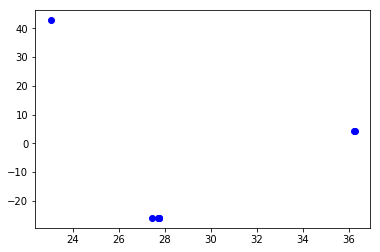

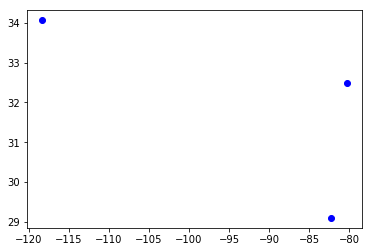

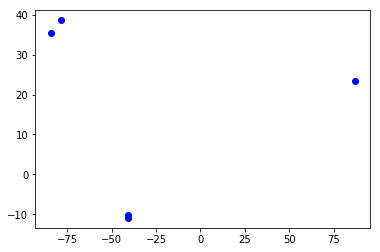

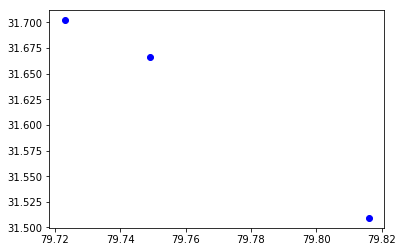

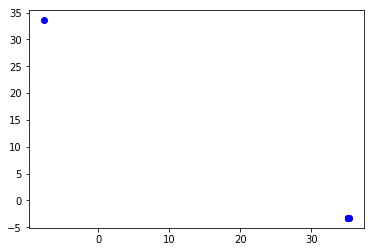

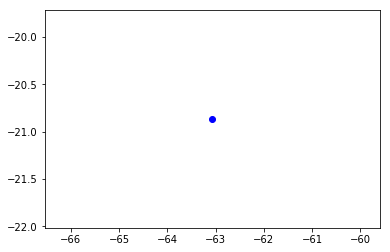

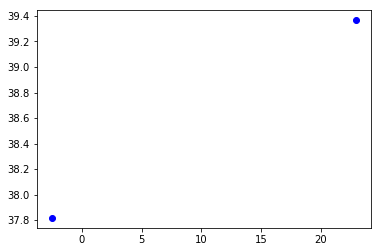

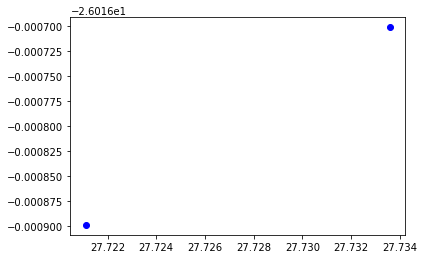

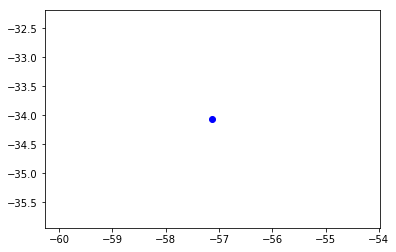

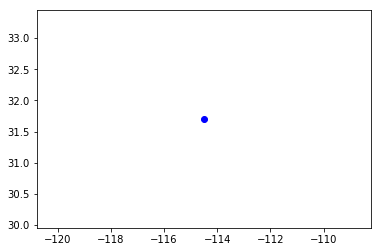

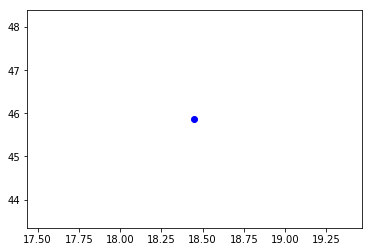

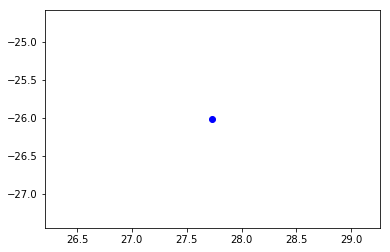

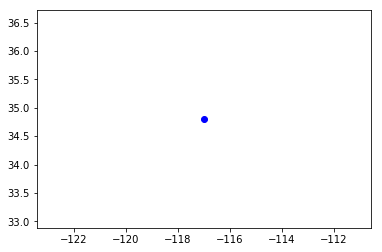

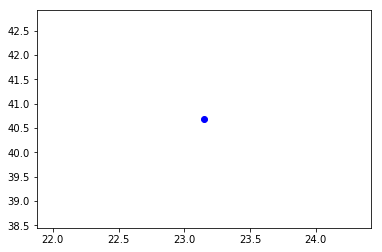

In [94]:
min_ma = column_extractor("formatted_panthera_col.csv", 0, 11) #extract lower bound of fossil age
max_ma = column_extractor("formatted_panthera_col.csv", 0, 12) #extract upper bound of fossil age
#iterate through data, find average fossil age, add it to a new dictionary with average fossil age for each fossil
avg_ma = {}
for key in min_ma.keys():
    avg = ( float(max_ma[key]) + float(min_ma[key]) ) / 2
    avg_ma[key] = avg
    
longitude = column_extractor("formatted_panthera_col.csv", 0, 3) #extract longitude column
latitude = column_extractor("formatted_panthera_col.csv", 0, 4) #extract latitude column

strat_lng2 = stratify(avg_ma, longitude) #stratify longitude by avg_ma
strat_lat2 = stratify(avg_ma, latitude) #stratify latitude by avg_ma


#this portion can be better done in r, where each new graph can be added to the last one


#this for loop will go through the fossils by avg_ma
for i in range(0, len(strat_lng2)):    
    x = strat_lng2[i]
    y = strat_lat2[i]
    map_plotter(x, y)